In [1]:
%matplotlib inline
from img_utils import show_image

In [3]:
!ls example_files

Diffusion.bvals         Diffusion.nii.gz        peaks.nii.gz
Diffusion.bvecs         nodif_brain_mask.nii.gz


We already calculated the peaks for you using MRtrix. If you do not have the peaks calculated yet you can simply input the Diffusion image to TractSeg and pass the argument `--raw_diffusion_input`. TractSeg will call MRtrix internally to calculate the peaks for you.

When looking at the peaks using MRtrix you will see something similar to the following:

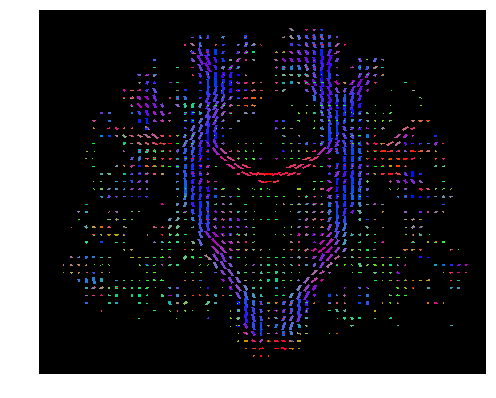

In [4]:
show_image("screenshots/peaks.png")

### Tract segmentation
Now we can call TractSeg by simply inputing the peaks and telling TractSeg to produce tract segmentations.

In [5]:
!TractSeg -i example_files/peaks.nii.gz -o output --output_type tract_segmentation

Loading weights from: /Users/jakob/.tractseg/pretrained_weights_tract_segmentation_v2.npz
Processing direction (1 of 3)
100%|█████████████████████████████████████████| 144/144 [00:47<00:00,  3.06it/s]
Processing direction (2 of 3)
100%|█████████████████████████████████████████| 144/144 [00:49<00:00,  2.91it/s]
Processing direction (3 of 3)
100%|█████████████████████████████████████████| 144/144 [00:49<00:00,  2.90it/s]


You can find the segmentations for all 72 bundles in the output directory

In [9]:
!ls output/tractseg_output/bundle_segmentations/

AF_left.nii.gz        IFO_right.nii.gz      ST_PAR_left.nii.gz
AF_right.nii.gz       ILF_left.nii.gz       ST_PAR_right.nii.gz
ATR_left.nii.gz       ILF_right.nii.gz      ST_POSTC_left.nii.gz
ATR_right.nii.gz      MCP.nii.gz            ST_POSTC_right.nii.gz
CA.nii.gz             MLF_left.nii.gz       ST_PREC_left.nii.gz
CC.nii.gz             MLF_right.nii.gz      ST_PREC_right.nii.gz
CC_1.nii.gz           OR_left.nii.gz        ST_PREF_left.nii.gz
CC_2.nii.gz           OR_right.nii.gz       ST_PREF_right.nii.gz
CC_3.nii.gz           POPT_left.nii.gz      ST_PREM_left.nii.gz
CC_4.nii.gz           POPT_right.nii.gz     ST_PREM_right.nii.gz
CC_5.nii.gz           SCP_left.nii.gz       T_OCC_left.nii.gz
CC_6.nii.gz           SCP_right.nii.gz      T_OCC_right.nii.gz
CC_7.nii.gz           SLF_III_left.nii.gz   T_PAR_left.nii.gz
CG_left.nii.gz        SLF_III_right.nii.gz  T_PAR_right.nii.gz
CG_right.nii.gz       SLF_II_left.nii.gz    T_POSTC_left.nii.gz
CST_left.nii.gz       SLF_II_right.nii.gz

Here is a screenshot of what the CST segmentation looks like if rendered in 3D:

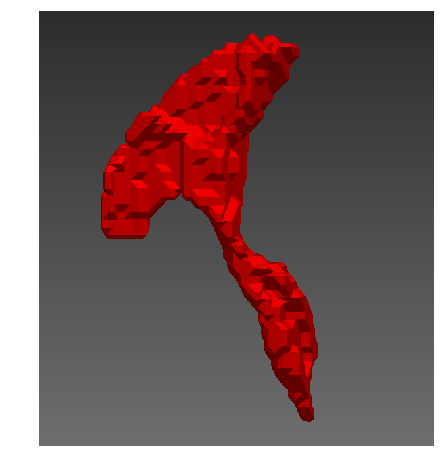

In [14]:
show_image("screenshots/tract_segmentation_CST.png")

### Start/end region segmentation
Now let us create segmentations of the start and end region of each tract by simply changing the `output_type`. Those will be used later on to remove streamlines not ending in the appropriate regions.

In [7]:
!TractSeg -i example_files/peaks.nii.gz -o output --output_type endings_segmentation

Loading weights from: /Users/jakob/.tractseg/pretrained_weights_endings_segmentation_v3.npz
Processing direction (1 of 3)
100%|█████████████████████████████████████████| 144/144 [00:53<00:00,  2.70it/s]
Processing direction (2 of 3)
100%|█████████████████████████████████████████| 144/144 [00:54<00:00,  2.63it/s]
Processing direction (3 of 3)
100%|█████████████████████████████████████████| 144/144 [00:57<00:00,  2.51it/s]


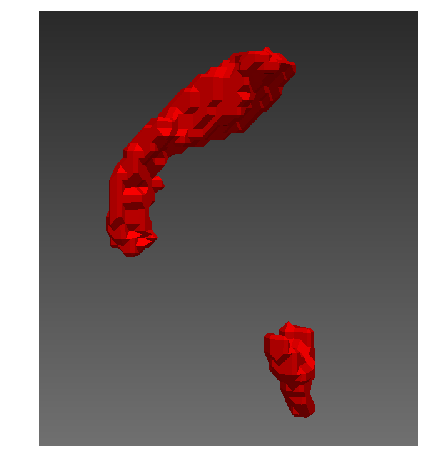

In [15]:
show_image("screenshots/start_and_end_region_CST.png")

### Tract Orientation Mapping
Now let us also create tract orientation maps (TOMs). Those give us a peak map for each tract.

In [10]:
!TractSeg -i example_files/peaks.nii.gz -o output --output_type TOM

Loading weights from: /Users/jakob/.tractseg/pretrained_weights_peak_regression_part1_v1.npz
100%|█████████████████████████████████████████| 144/144 [00:53<00:00,  2.72it/s]
Loading weights from: /Users/jakob/.tractseg/pretrained_weights_peak_regression_part2_v1.npz
100%|█████████████████████████████████████████| 144/144 [00:53<00:00,  2.68it/s]
Loading weights from: /Users/jakob/.tractseg/pretrained_weights_peak_regression_part3_v1.npz
100%|█████████████████████████████████████████| 144/144 [00:55<00:00,  2.60it/s]
Loading weights from: /Users/jakob/.tractseg/pretrained_weights_peak_regression_part4_v1.npz
100%|█████████████████████████████████████████| 144/144 [00:52<00:00,  2.74it/s]


The Tract Orientation Map for the cortico-spinal tract (CST) looks similar to the following: 

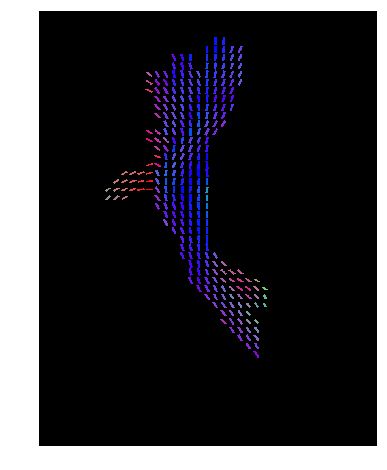

In [17]:
show_image("screenshots/TOM_CST.png")

### Tracking
Now we have everything we need to create bundle-specific tractograms. The following commands expects that a folder named `tractseg_output` (containing the previous results) exists inside of the directory specified as output. It will automatically use the tract segmentations, start/end region segmentations and the Tract Orientation Maps (TOMs) to generate bundle-specific tractograms.
It will run a tracking algorithm on the TOMs and only keep those streamlines starting and ending in the start/end regions and not leaving the tract mask.

In [12]:
!Tracking -i examples_files/peaks.nii.gz -o output

100%|███████████████████████████████████████████| 72/72 [08:09<00:00,  6.80s/it]


Let's have a look at the results:

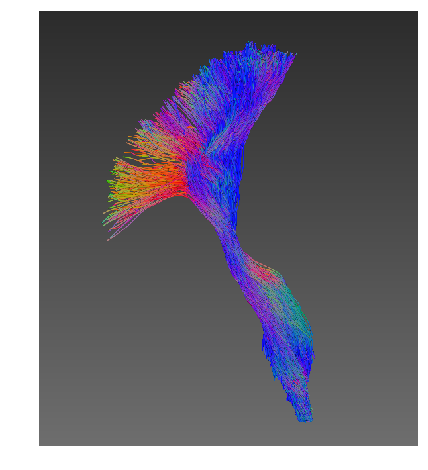

In [18]:
show_image("screenshots/tractogram_CST.png")

The `tractseg_output` folder looks the following now:

In [19]:
!ls output/tractseg_output/

TOM                   bundle_segmentations
TOM_trackings         endings_segmentations


That's basically all there is to do.